#  **EBAC Python Final Project**

**Objetivo:** criar um notebook e contar uma história com os dados utilizando o Kaggle, afim de construir o projeto final do curso de Python da Escola Britânica de Artes Criativas & Tecnologia (EBAC).

**Objetivo da análise:** através dos dados fornecidos entender o comportamento dos clientes, entender a correlação entre os dados fornecidos e encontrar soluções para os problemas do banco.

In [7]:
#Importando bibliotecas

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [8]:
df = pd.read_csv("C:\\Users\\jvict\\OneDrive\\Documentos\\EBAC\\Python_M10_support material.csv", na_values ='na')

# Base de dados
* A coluna "default" é utilizada para sinalizar se o cliente está adimplente (default = 0) ou se ele está inadimplente (default = 1).

In [9]:
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


# Explorando os dados:

* **Analisando a dimenção dos dados**

In [10]:
print(f'Tamanho do dataframe: {df.shape}')


Tamanho do dataframe: (10127, 16)


In [11]:
df_total, _ = df.shape
df_adimplentes, _ = df[df['default']==0].shape
df_inadimplentes, _ = df[df['default']==1].shape

print(f"A proporção de clientes adimplentes é de {round(df_adimplentes/df_total,2)*100}%")
print(f"A proporção de clientes inadimplentes é de {round(df_inadimplentes/df_total,2)*100}%")

A proporção de clientes adimplentes é de 84.0%
A proporção de clientes inadimplentes é de 16.0%


In [12]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

*  **Pode-se observar que as colunas "limite_credito " e "valor_transacoes_12m " estão nos formatos errados**

In [13]:
df.select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10127.0,7.391776e+08,3.690378e+07,708082083.0,713036770.5,717926358.0,773143533.0,828343083.0
default,10127.0,1.606596e-01,3.672348e-01,0.0,0.0,0.0,0.0,1.0
idade,10127.0,4.632596e+01,8.016814e+00,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203e+00,1.298908e+00,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,3.592841e+01,7.986416e+00,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580e+00,1.554408e+00,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317e+00,1.106225e+00,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167e+00,1.010622e+00,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,6.485869e+01,2.347257e+01,10.0,45.0,67.0,81.0,139.0


In [14]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


# **Limpando os dados**

* **Os dados precisam ser mudados para o formato inglês para que o Python possa entender, então removeremos os pontos e trocaremos a vírgula decimal por um ponto.**

In [15]:
df['limite_credito'] = df['limite_credito'].map(lambda valor: float(valor.replace(".", "").replace(",", ".")))
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].map(lambda valor: float(valor.replace(".", "").replace(",", ".")))

In [16]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

**Checando se existem valores nulos nos dados**

In [17]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

**Agora que sabemos que existem dados faltando, resta descobrir quantos e como isso afeta os dados**

In [18]:
df.count()

id                         10127
default                    10127
idade                      10127
sexo                       10127
dependentes                10127
escolaridade                8608
estado_civil                9378
salario_anual               9015
tipo_cartao                10127
meses_de_relacionamento    10127
qtd_produtos               10127
iteracoes_12m              10127
meses_inativo_12m          10127
limite_credito             10127
valor_transacoes_12m       10127
qtd_transacoes_12m         10127
dtype: int64

 **Primeiro vemos quantos dados estão faltando no banco de dados total:**

In [19]:
print(f"Na coluna escolaridade estão faltando: {(df_total - df['escolaridade'].count())}, que é igual a {round(((df_total - df['escolaridade'].count())/df_total)*100)}%")
print(f"Na coluna estado_civil estão faltando: {(df_total - df['estado_civil'].count())}, que é igual a {round(((df_total - df['estado_civil'].count())/df_total)*100)}%")
print(f"Na coluna salario_anual estão faltando: {(df_total - df['salario_anual'].count())}, que é igual a {round(((df_total - df['salario_anual'].count())/df_total)*100)}%")

Na coluna escolaridade estão faltando: 1519, que é igual a 15%
Na coluna estado_civil estão faltando: 749, que é igual a 7%
Na coluna salario_anual estão faltando: 1112, que é igual a 11%


 **Quantos estão faltando são adimplentes?**

In [20]:
#analisando quantas das informações faltando são de adimplentes
print(f"Na coluna escolaridade estão faltando: {df[df['default']==0].escolaridade.isna().sum()}, que é igual a {round(((df_adimplentes - df[df['default']==0].escolaridade.count())/df_adimplentes)*100)}%")
print(f"Na coluna estado_civil estão faltando: {df[df['default']==0].estado_civil.isna().sum()}, que é igual a {round(((df_adimplentes - df[df['default']==0].estado_civil.count())/df_adimplentes)*100)}%")
print(f"Na coluna salario_anual estão faltando: {df[df['default']==0].salario_anual.isna().sum()}, que é igual a {round(((df_adimplentes - df[df['default']==0].salario_anual.count())/df_adimplentes)*100)}%")


Na coluna escolaridade estão faltando: 1263, que é igual a 15%
Na coluna estado_civil estão faltando: 620, que é igual a 7%
Na coluna salario_anual estão faltando: 925, que é igual a 11%


**Quantos estão faltando são inadimplentes?**

In [21]:
#analisando quantas das informações faltando são de inadimplentes
print(f"Na coluna escolaridade estão faltando: {df[df['default']==1].escolaridade.isna().sum()}, que é igual a {round(((df_inadimplentes - df[df['default']==1].escolaridade.count())/df_inadimplentes)*100)}%")
print(f"Na coluna estado_civil estão faltando: {df[df['default']==1].estado_civil.isna().sum()}, que é igual a {round(((df_inadimplentes - df[df['default']==1].estado_civil.count())/df_inadimplentes)*100)}%")
print(f"Na coluna salario_anual estão faltando: {df[df['default']==1].salario_anual.isna().sum()}, que é igual a {round(((df_inadimplentes - df[df['default']==1].salario_anual.count())/df_inadimplentes)*100)}%")


Na coluna escolaridade estão faltando: 256, que é igual a 16%
Na coluna estado_civil estão faltando: 129, que é igual a 8%
Na coluna salario_anual estão faltando: 187, que é igual a 11%


**Pode-se observar que os dados faltando estão bem distribuídos e proporcionais, então é possível apagá-los sem muito dano aos dados**

In [22]:
df.dropna(inplace=True)

In [23]:
df.shape

(7081, 16)

#  **Dados limpos**

In [24]:
df.count()

id                         7081
default                    7081
idade                      7081
sexo                       7081
dependentes                7081
escolaridade               7081
estado_civil               7081
salario_anual              7081
tipo_cartao                7081
meses_de_relacionamento    7081
qtd_produtos               7081
iteracoes_12m              7081
meses_inativo_12m          7081
limite_credito             7081
valor_transacoes_12m       7081
qtd_transacoes_12m         7081
dtype: int64

In [25]:
df[df['default'] == 0].shape

(5968, 16)

In [26]:
df[df['default'] == 1].shape

(1113, 16)

In [27]:
df_total_novo, _ = df.shape
df_adimplentes_novo, _ = df[df['default'] == 0].shape
df_inadimplentes_novo, _ = df[df['default'] == 1].shape

print(f"A proporcão adimplentes ativos é de {round(100 * df_adimplentes / df_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * df_adimplentes_novo / df_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * df_inadimplentes / df_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * df_inadimplentes_novo / df_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


# **Visualização de dados**

In [28]:
df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

In [29]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


C:\Users\jvict\AppData\Local\Temp\ipykernel_11452\3423702270.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


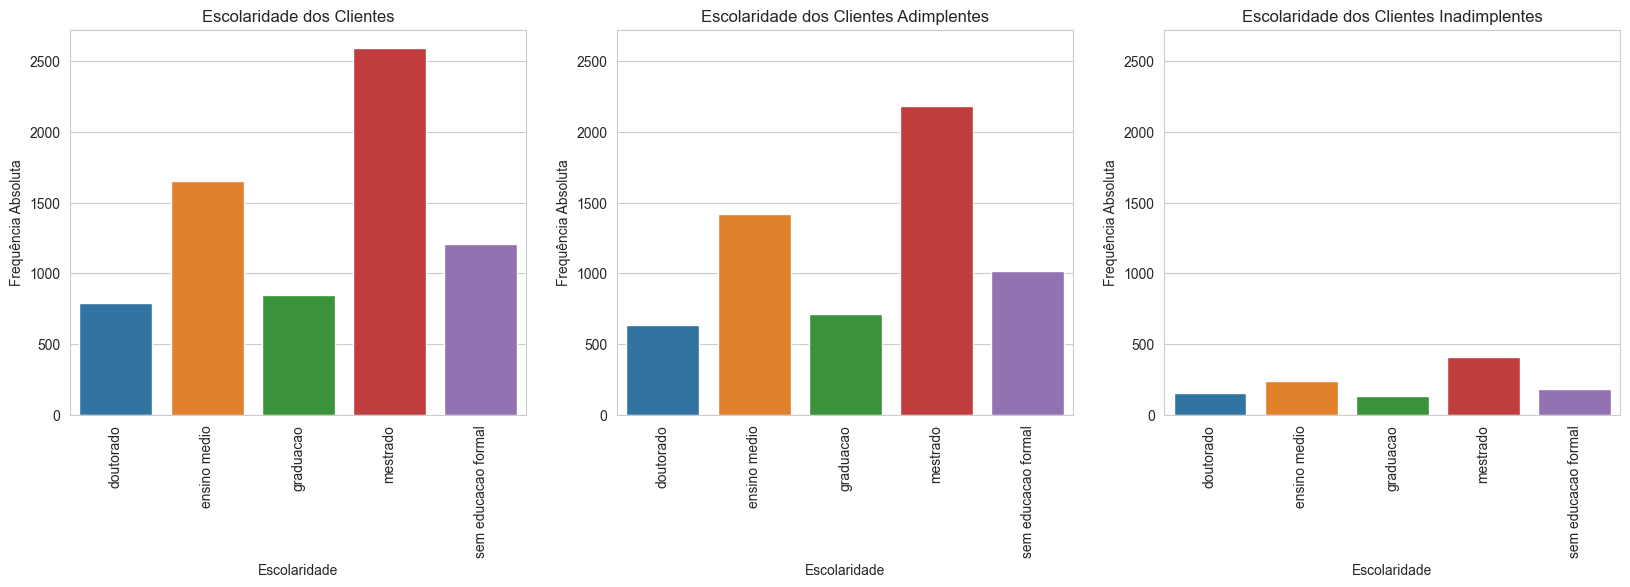

In [30]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* Podemos ver que a grande concentração de clientes tem alguma tipo de formação superior.
* Em contraste, também existe uma considerável população de clientes sem formação educacional formal, que quase se equipara em número à quantidade de pessoas que possuem ensino médio.
* Quando comparados com o total, os clientes adimplentes apresentam o mesmo comportamento.
* Existe uma discreta diferença no comportamento dos clientes inadimplentes, onde aqueles que possuem doutorado estão ligeiramente acima daqueles com graduação.

C:\Users\jvict\AppData\Local\Temp\ipykernel_11452\351066996.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


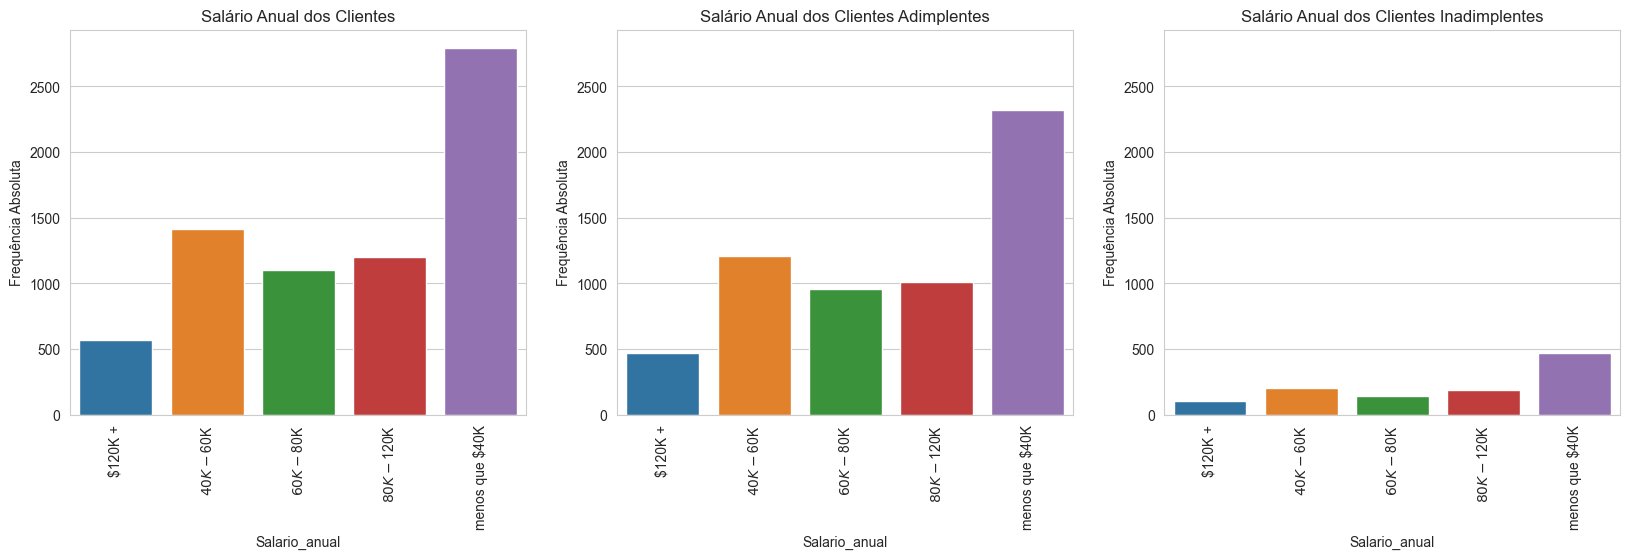

In [31]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(inplace=True, drop=True)
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

* Uma vez que os adimplentes representam mais de 80% da nossa base, é esperado que eles acompanhem o comportamento dos dados gerais.
* O cenário dos inadimplentes igualmente reflete o comportamento do total de clientes, o que não contribui para a compreensão do padrão de inadimplência.

**Para melhor analise vamos remover os dados numéricos que não serão usados**

In [32]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


**Quantidade de transações nos Ultimos 12 Meses**

C:\Users\jvict\AppData\Local\Temp\ipykernel_11452\3045762736.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


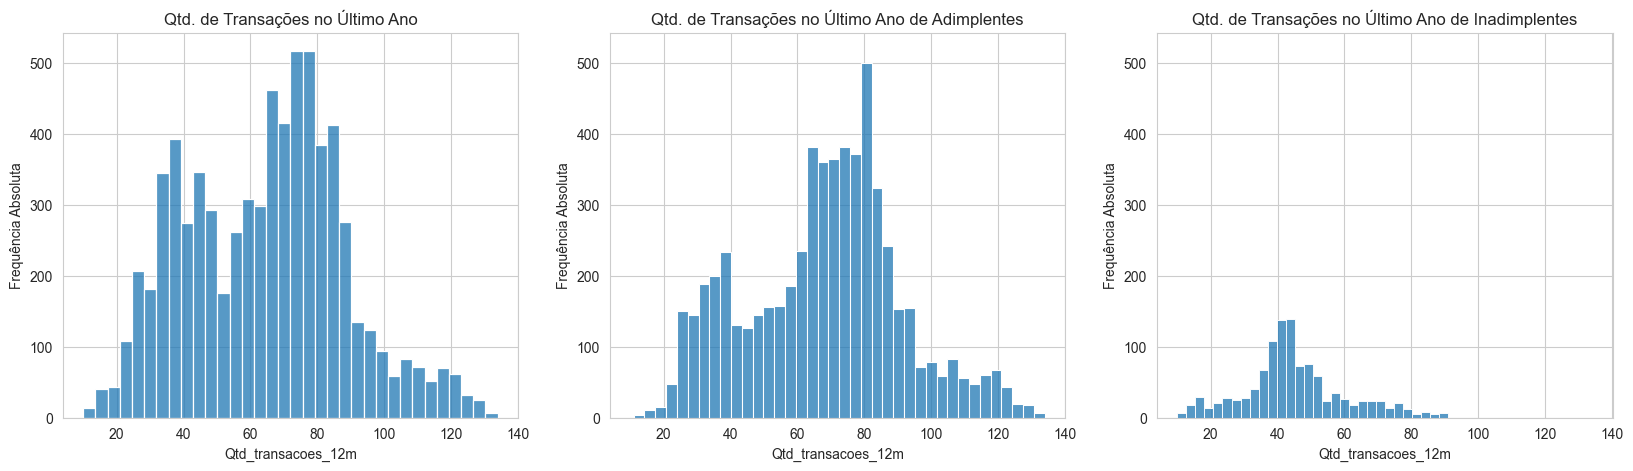

In [33]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* É possível notar a presença de dois picos distintos no volume de transações no conjunto geral de dados, o primeiro situado no intervalo entre 20 e 60, e o segundo entre 70 e 100.
* Os clientes em situação regular demonstram uma predominância significativa em termos de volume de transações, especialmente na faixa de 60 a 80 transações
* Os clientes inadimplentes exibem uma quantidade reduzida de transações, geralmente concentradas na faixa de 20 a 60 operações.

**Valor das transações nos Últimos 12 meses**

C:\Users\jvict\AppData\Local\Temp\ipykernel_11452\3932491844.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


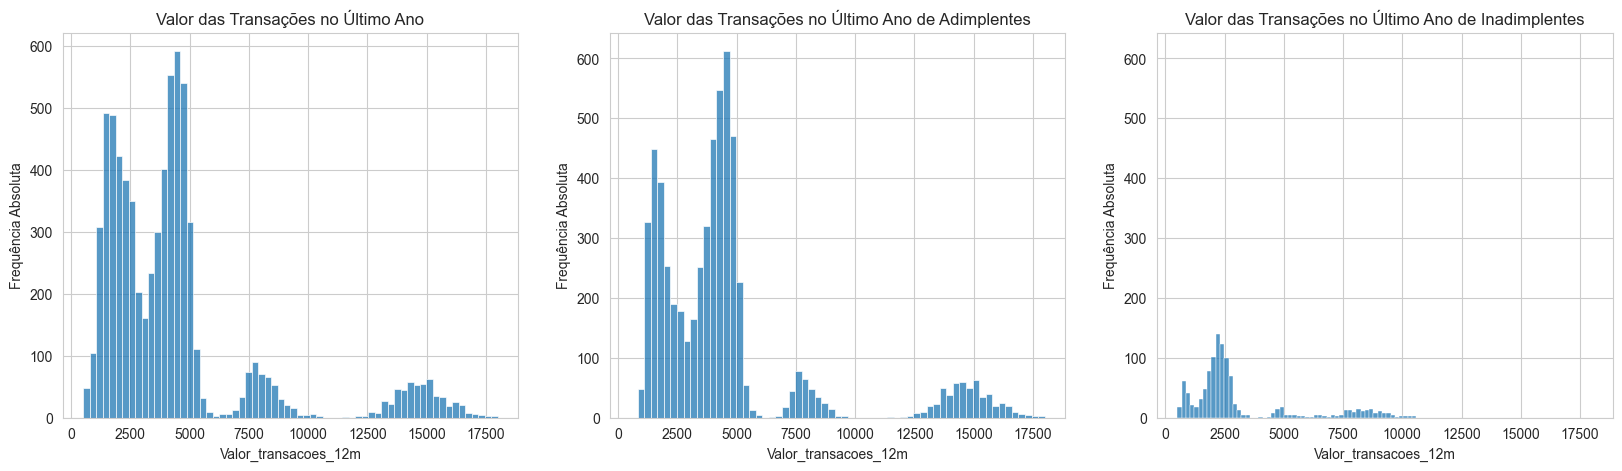

In [34]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* A predominância das transações efetuadas pelos clientes ocorre nas faixas de valores entre 1500 e 2500, assim como entre 3000 e 5000. Além disso, são observados picos notáveis nas transações nos intervalos de 7500 a 10000 e de 13000 a 17000.
* É possível notar que os clientes inadimplentes estão exibindo um padrão comportamental no qual seus valores de transação nos últimos 12 meses se mantêm bastante próximos a 2500.

**Meses de relacionamento com o banco**

C:\Users\jvict\AppData\Local\Temp\ipykernel_11452\989811400.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


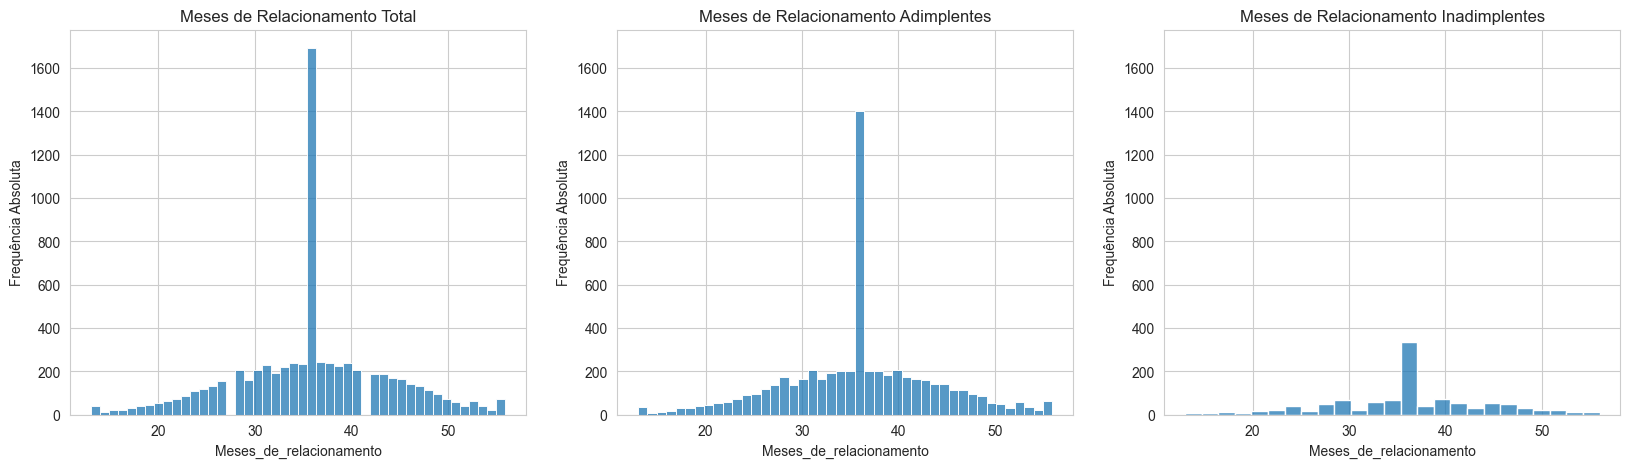

In [35]:
coluna = 'meses_de_relacionamento'
titulos = ['Meses de Relacionamento Total', 'Meses de Relacionamento Adimplentes', 'Meses de Relacionamento Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* A duração do relacionamento dos clientes está predominantemente concentrada em 36 meses e não apresenta indícios que revelem variações ou influências significativas na inadimplência.

**Limite de crédido dos clientes**


C:\Users\jvict\AppData\Local\Temp\ipykernel_11452\2035165015.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


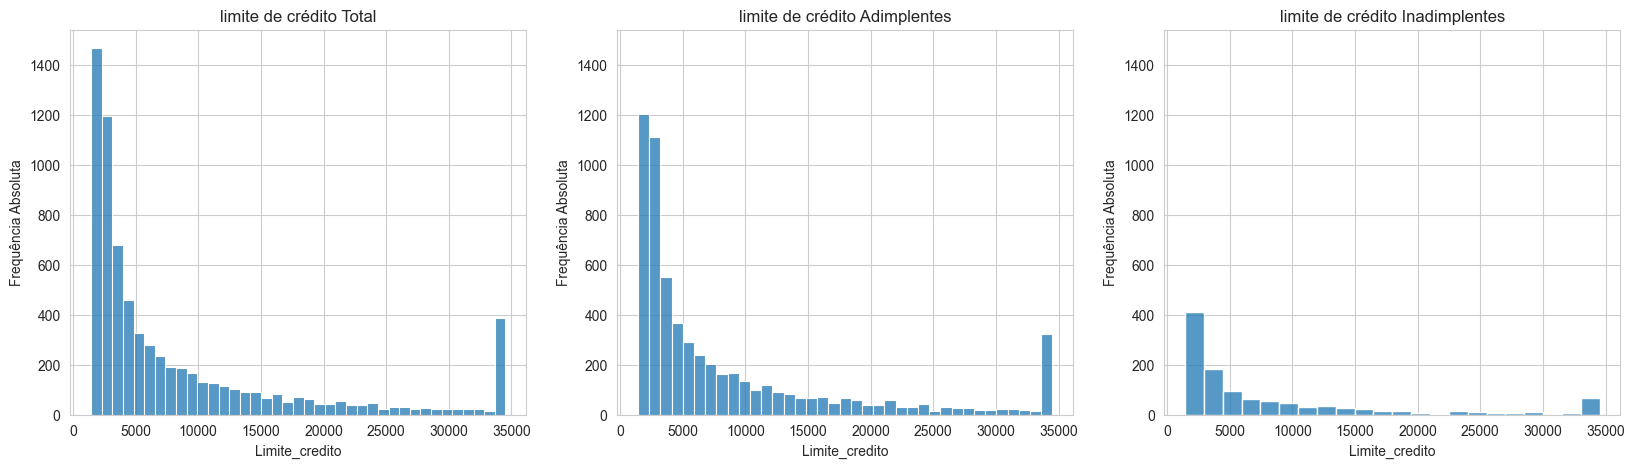

In [36]:
coluna = 'limite_credito'
titulos = ['limite de crédito Total', 'limite de crédito Adimplentes', 'limite de crédito Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* O comportamento dos clientes é consistente em todos os cenários e não apresenta indícios de influência na inadimplência.

**Meses Inativos**

C:\Users\jvict\AppData\Local\Temp\ipykernel_11452\2840364861.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


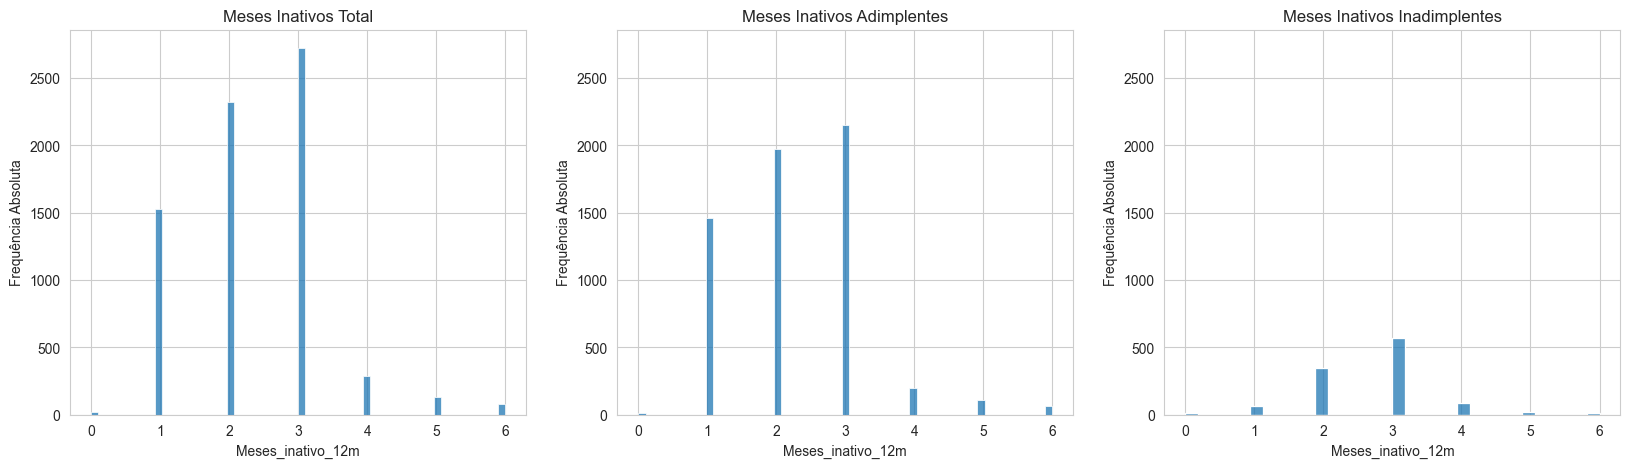

In [37]:
coluna = 'meses_inativo_12m'
titulos = ['Meses Inativos Total', 'Meses Inativos Adimplentes', 'Meses Inativos Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* É possível observar um significativo número de clientes inadimplentes inativos por 2 e 3 meses, nos quais a proporção é substancialmente maior do que o esperado.

**Quantidade de produtos**

C:\Users\jvict\AppData\Local\Temp\ipykernel_11452\1118319715.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


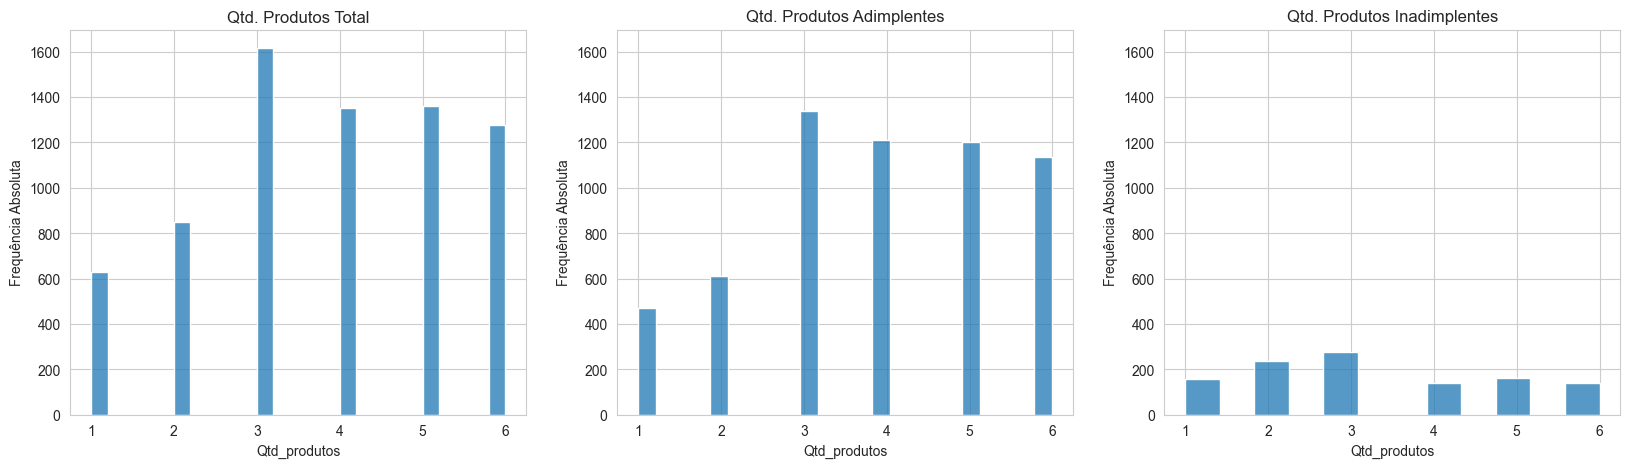

In [38]:
coluna = 'qtd_produtos'
titulos = ['Qtd. Produtos Total', 'Qtd. Produtos Adimplentes', 'Qtd. Produtos Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* O comportamento dos clientes é consistente em todos os cenários e não apresenta indícios de influência na inadimplência.

**Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses**

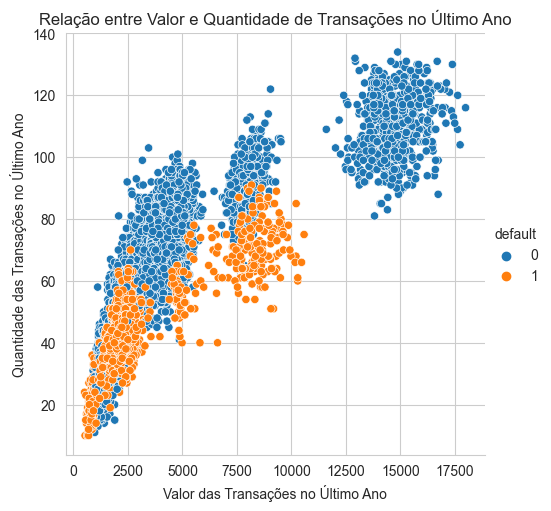

In [39]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )

* É evidente uma notável concentração de clientes adimplentes que exibem um comportamento caracterizado pela realização de múltiplas transações de valor mais elevado.
* Por outro lado, é perceptível a concentração de clientes inadimplentes com valores mais baixos de transação, sobretudo nas faixas entre 1000 e 2500, assim como entre 7500 e 10000.

# Resumo dos Insights:

* Não foram identificadas informações relevantes para compreender o comportamento dos membros em situação de inadimplência nas colunas: limite de crédito, meses de relacionamento, salário e escolaridade.
* As estratégias de pesquisa e intervenção devem ser focalizadas nos seguintes grupos de clientes: aqueles com baixo volume de transações e valores inferiores a 2.5 mil reais; bem como clientes com um volume médio de transações e valores situados na faixa de 7 mil a 10 mil reais.
* É notável a presença de um número considerável de clientes inadimplentes que permanecem inativos por períodos de 2 a 3 meses, apresentando uma proporção significativamente superior àquela que era esperada.